In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('EastWestAirlines.xlsx')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.columns


Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [3]:
#find did any null values exists
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
# finding different datatypes in data set
print(df.dtypes)

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object


In [5]:
#remove outlier, NaN
import numpy as np
non_zero=['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']
for column in non_zero:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)
    print(df[column])

0          1
1          2
2          3
3          4
4          5
        ... 
3994    4017
3995    4018
3996    4019
3997    4020
3998    4021
Name: ID#, Length: 3999, dtype: int64
0       28143.0
1       19244.0
2       41354.0
3       14776.0
4       97752.0
         ...   
3994    18476.0
3995    64385.0
3996    73597.0
3997    54899.0
3998     3016.0
Name: Balance, Length: 3999, dtype: float64
0       2550.0
1       2550.0
2       2550.0
3       2550.0
4       2550.0
         ...  
3994    2550.0
3995    2550.0
3996    2550.0
3997    2550.0
3998    2550.0
Name: Qual_miles, Length: 3999, dtype: float64
0       1
1       1
2       1
3       1
4       4
       ..
3994    1
3995    1
3996    3
3997    1
3998    1
Name: cc1_miles, Length: 3999, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
3994    1
3995    1
3996    1
3997    1
3998    1
Name: cc2_miles, Length: 3999, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
3994    1
3995    1

In [6]:
#check for columns with mixed types
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"Column {col} has mixed data types.")
    else:
        print(f"Column {col} don't have mixed data types.")

Column ID# don't have mixed data types.
Column Balance don't have mixed data types.
Column Qual_miles don't have mixed data types.
Column cc1_miles don't have mixed data types.
Column cc2_miles don't have mixed data types.
Column cc3_miles don't have mixed data types.
Column Bonus_miles don't have mixed data types.
Column Bonus_trans don't have mixed data types.
Column Flight_miles_12mo don't have mixed data types.
Column Flight_trans_12 don't have mixed data types.
Column Days_since_enroll don't have mixed data types.
Column Award? don't have mixed data types.


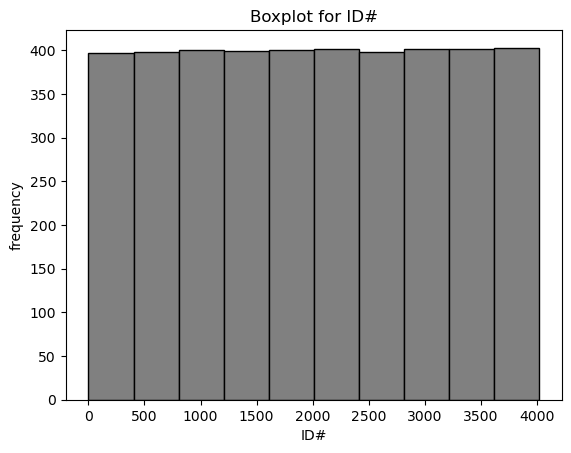

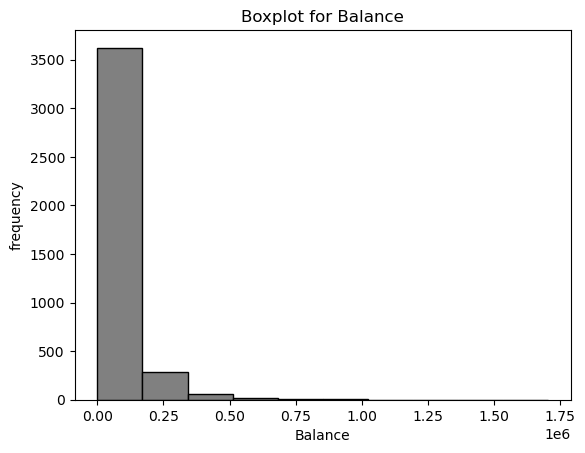

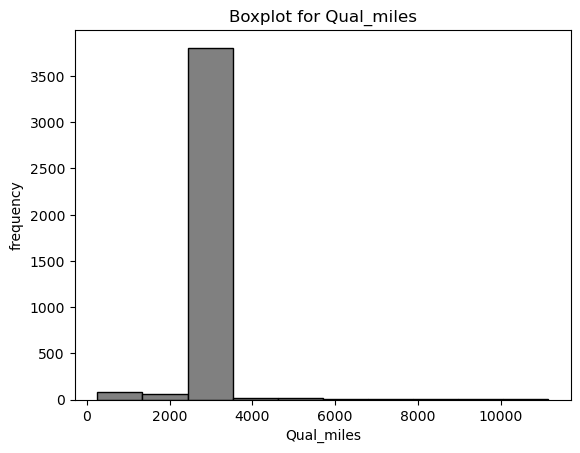

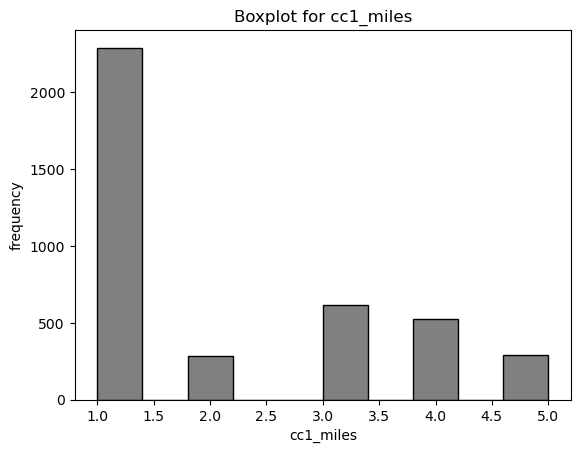

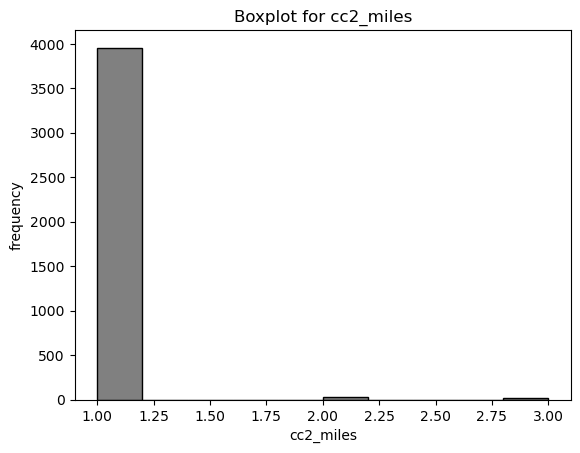

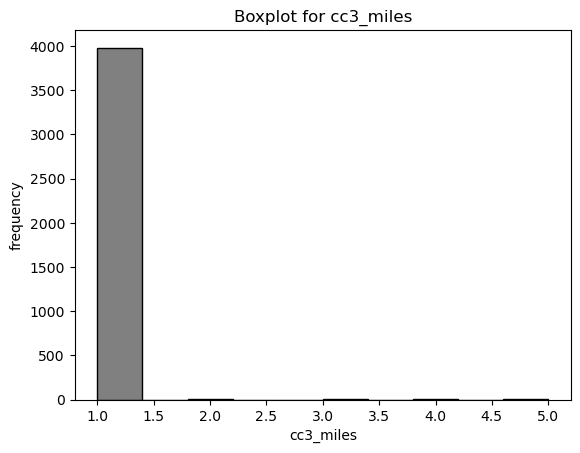

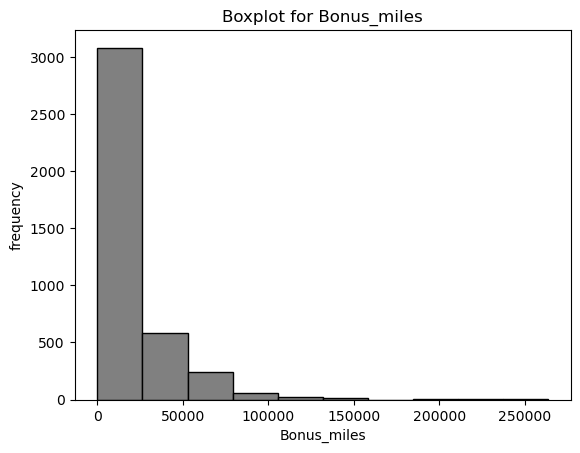

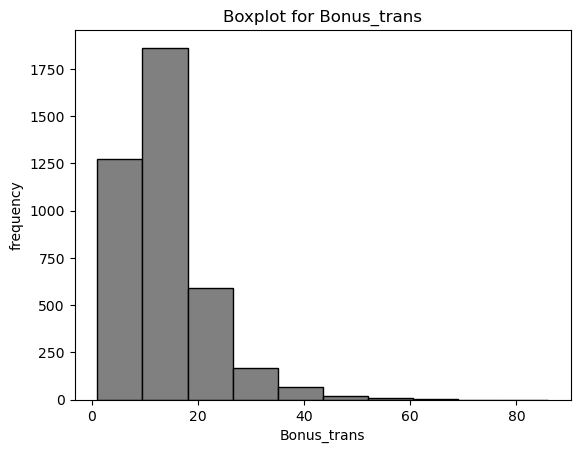

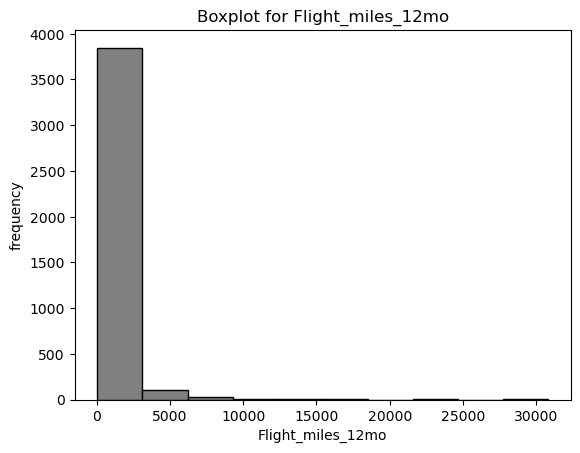

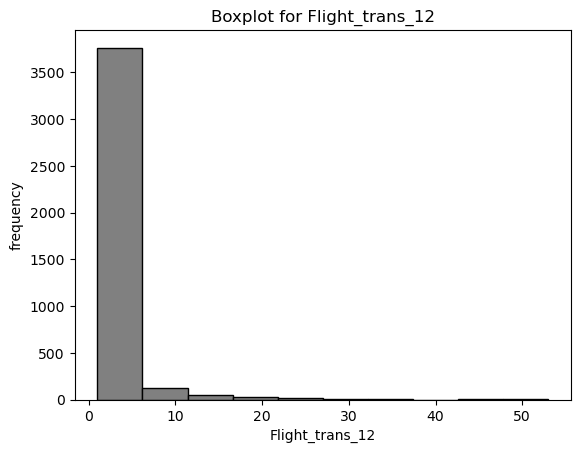

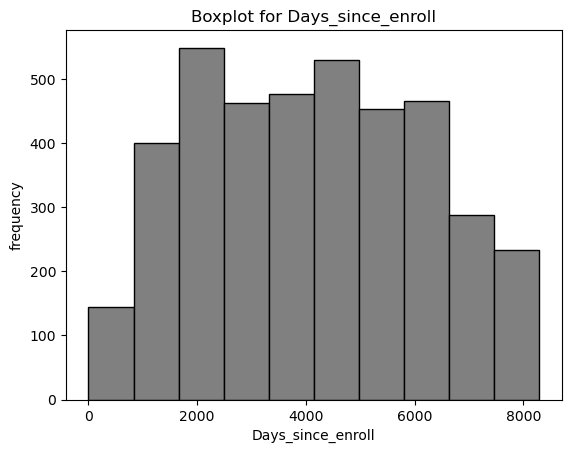

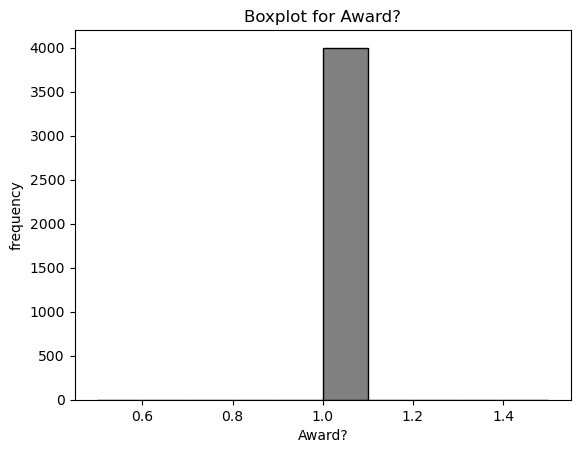

In [7]:
# creating histograms for numerical columns
# selecting only numerical columns
for column in df.select_dtypes(include='number').columns:
    #creating histogram
    plt.hist(df[column],edgecolor='black',color='grey')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.show()

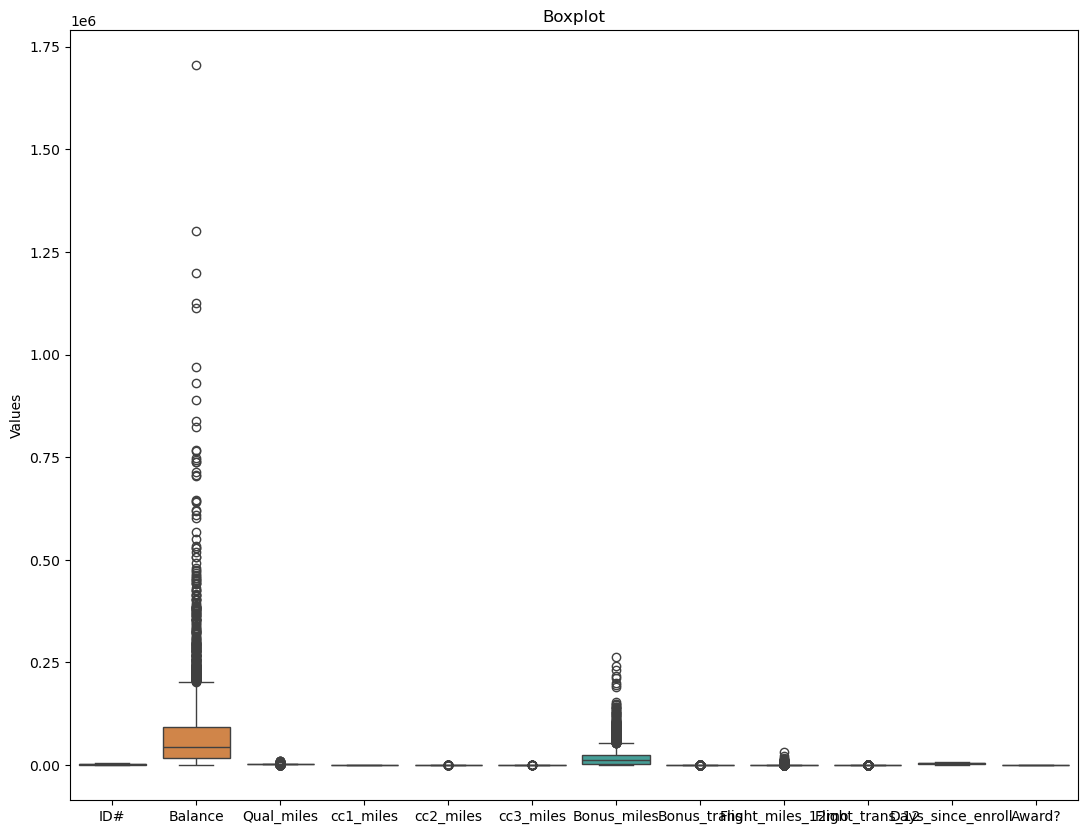

In [8]:
# creating boxplot
plt.figure(figsize=(13, 10))
sns.boxplot(df)
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

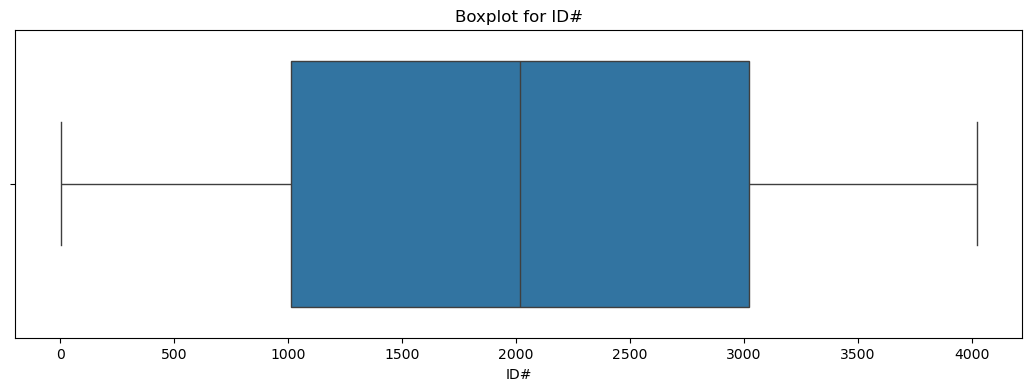

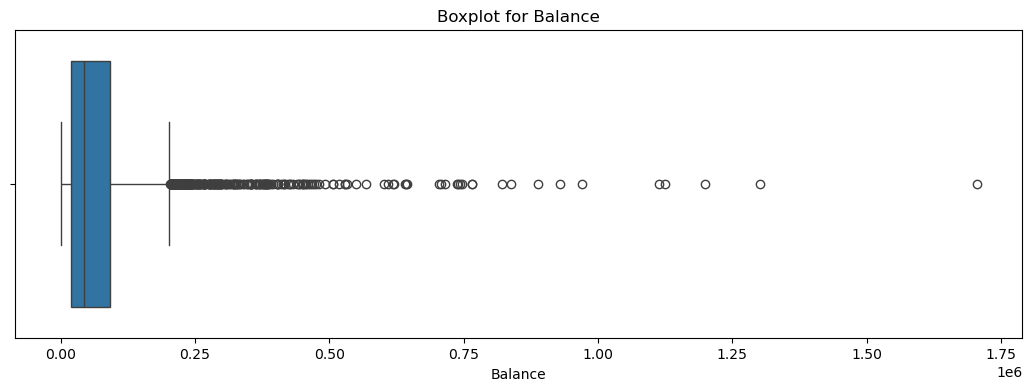

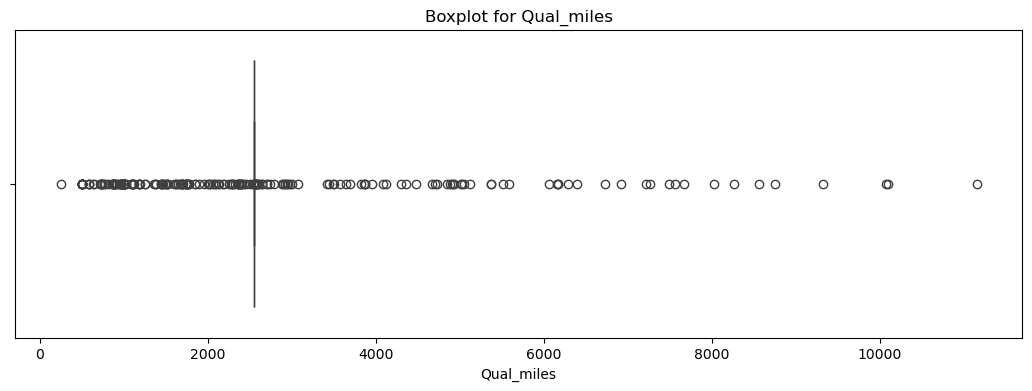

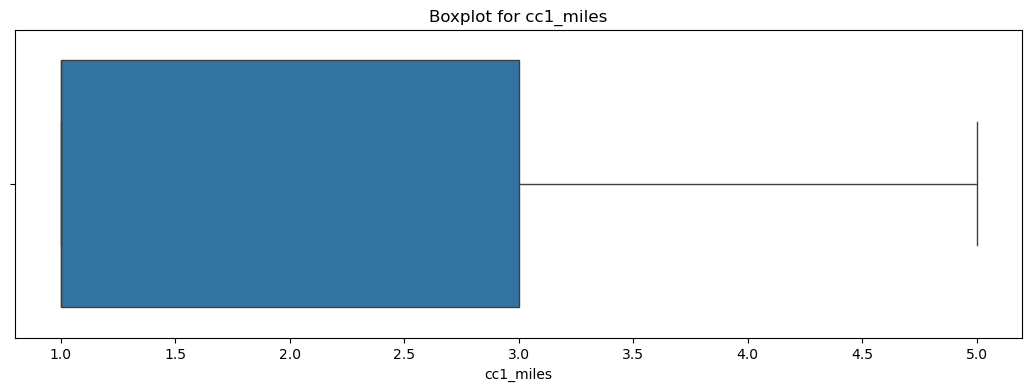

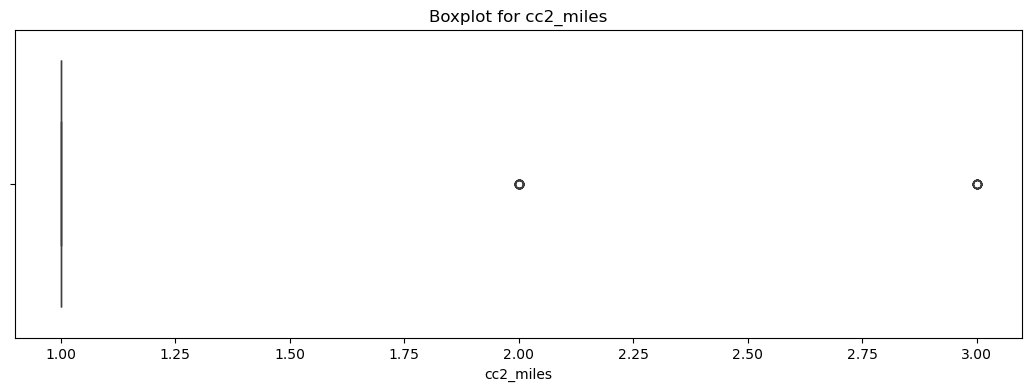

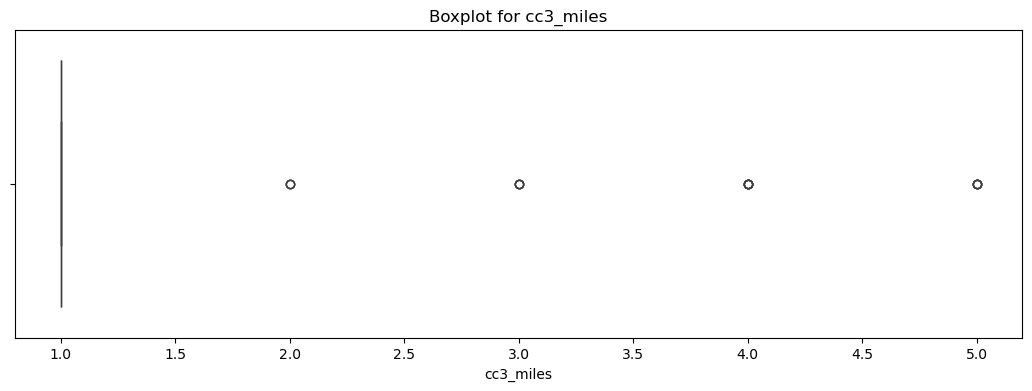

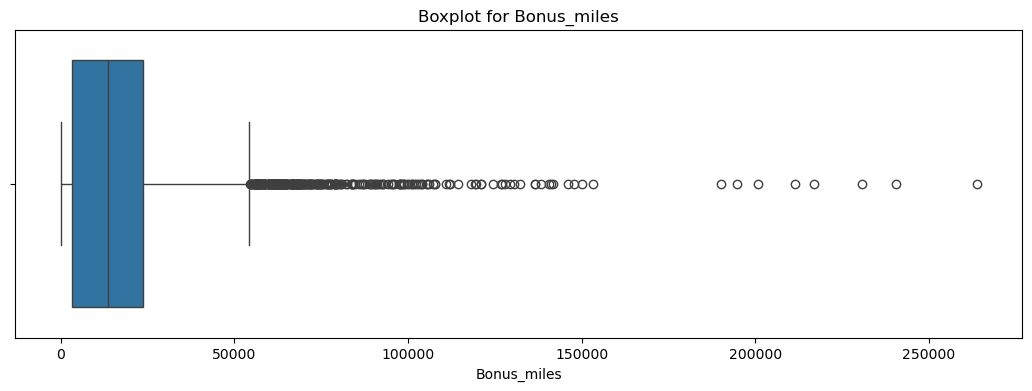

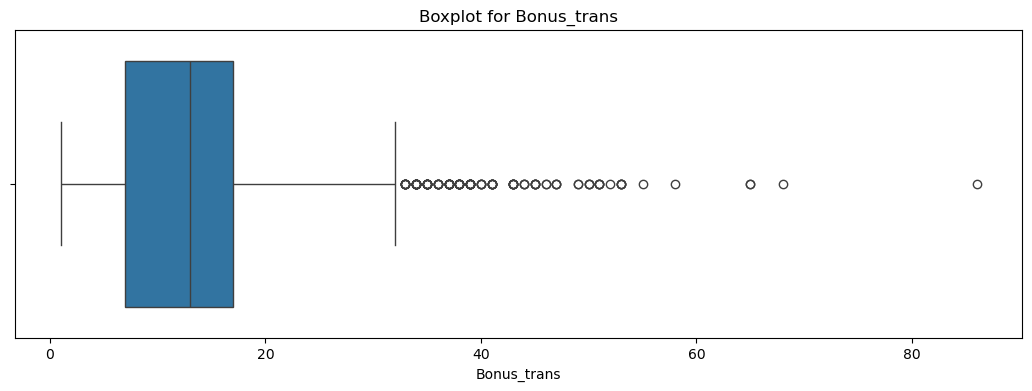

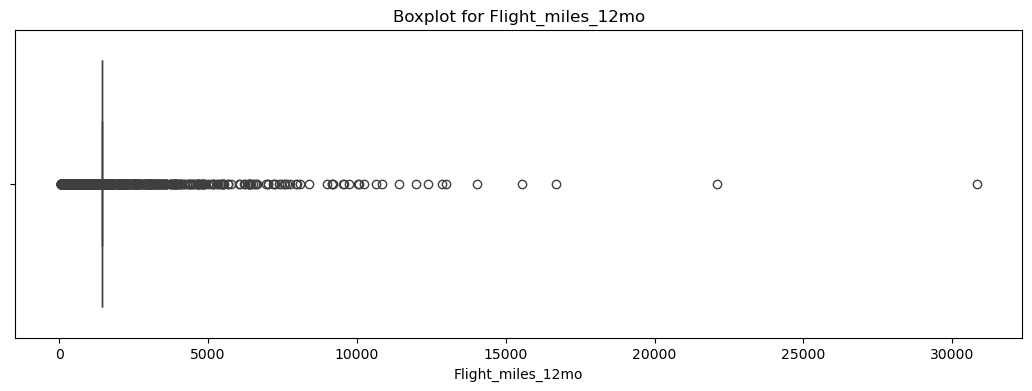

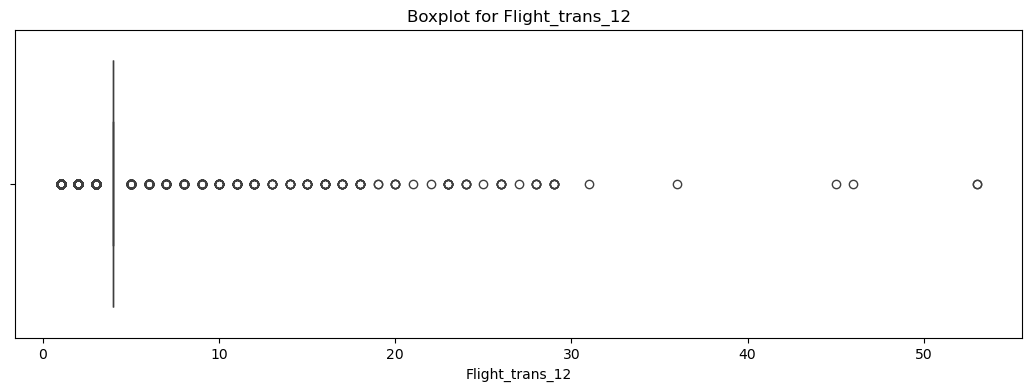

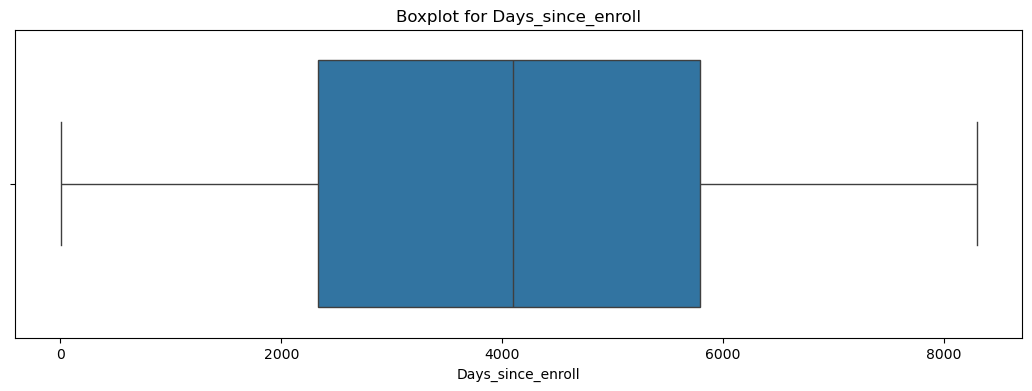

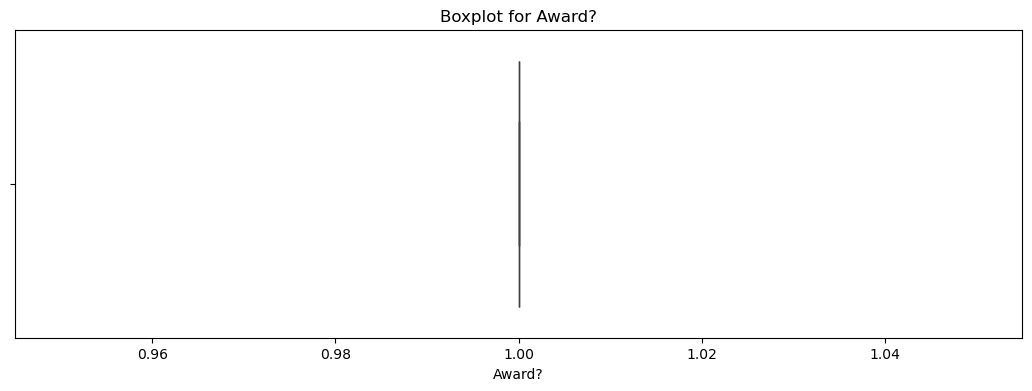

In [9]:
# Alternatively, using seaborn for better visualization creating boxplot for each column seperately
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(13, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


<Axes: >

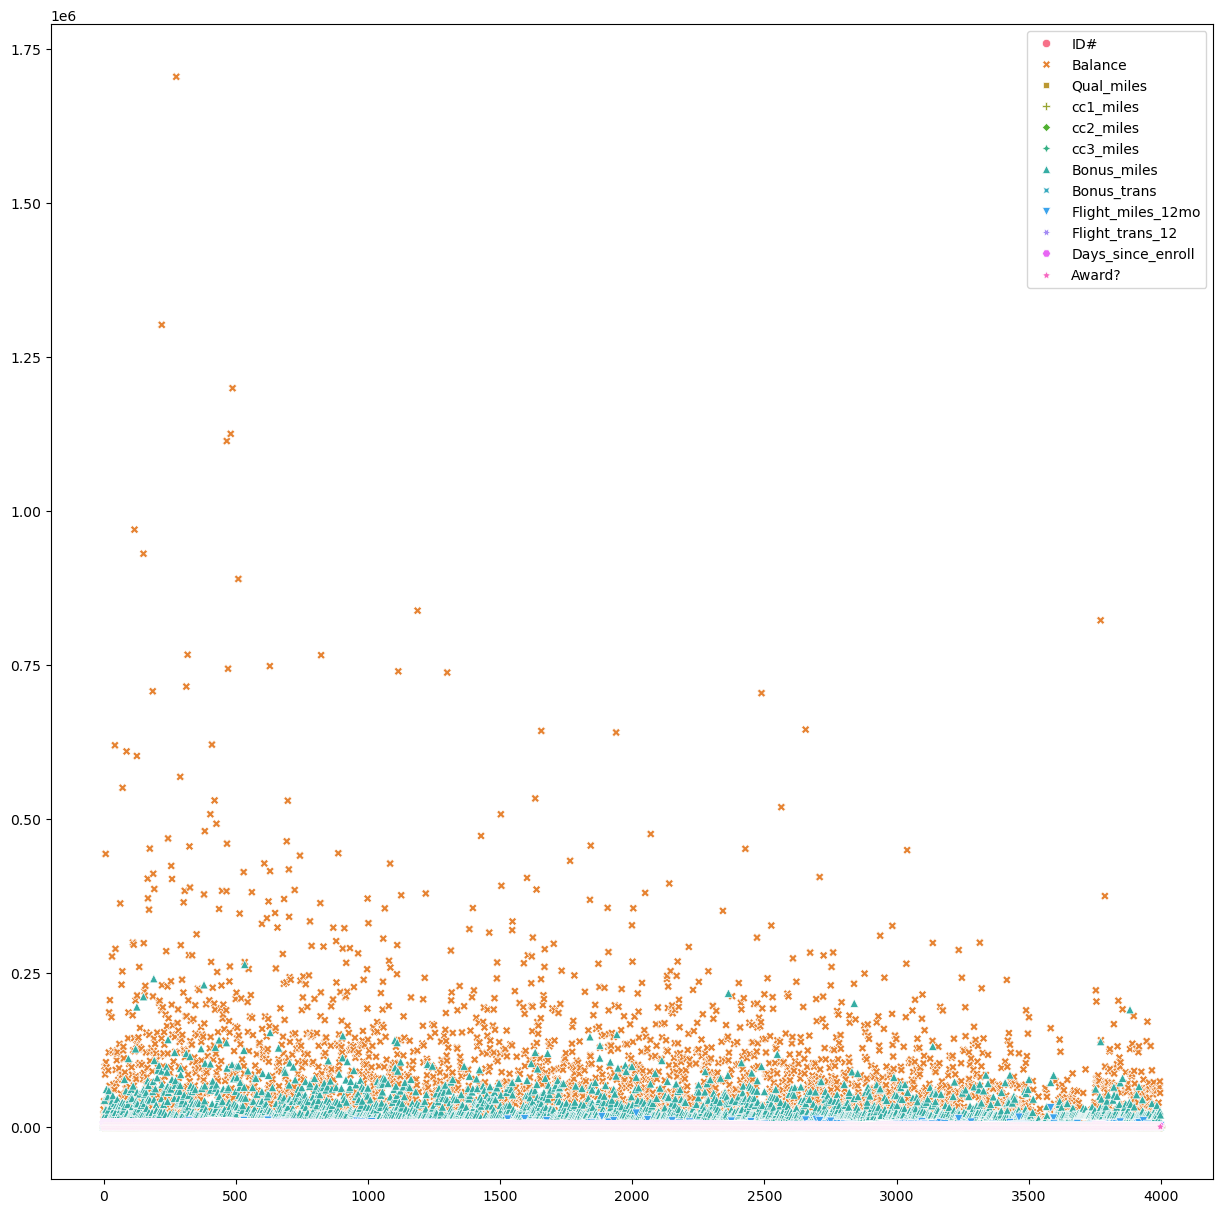

In [10]:
# Generating scatter plots to explore relationships between pairs of variables

plt.figure(figsize=(15,15))
sns.scatterplot(df)

<Figure size 1500x1500 with 0 Axes>

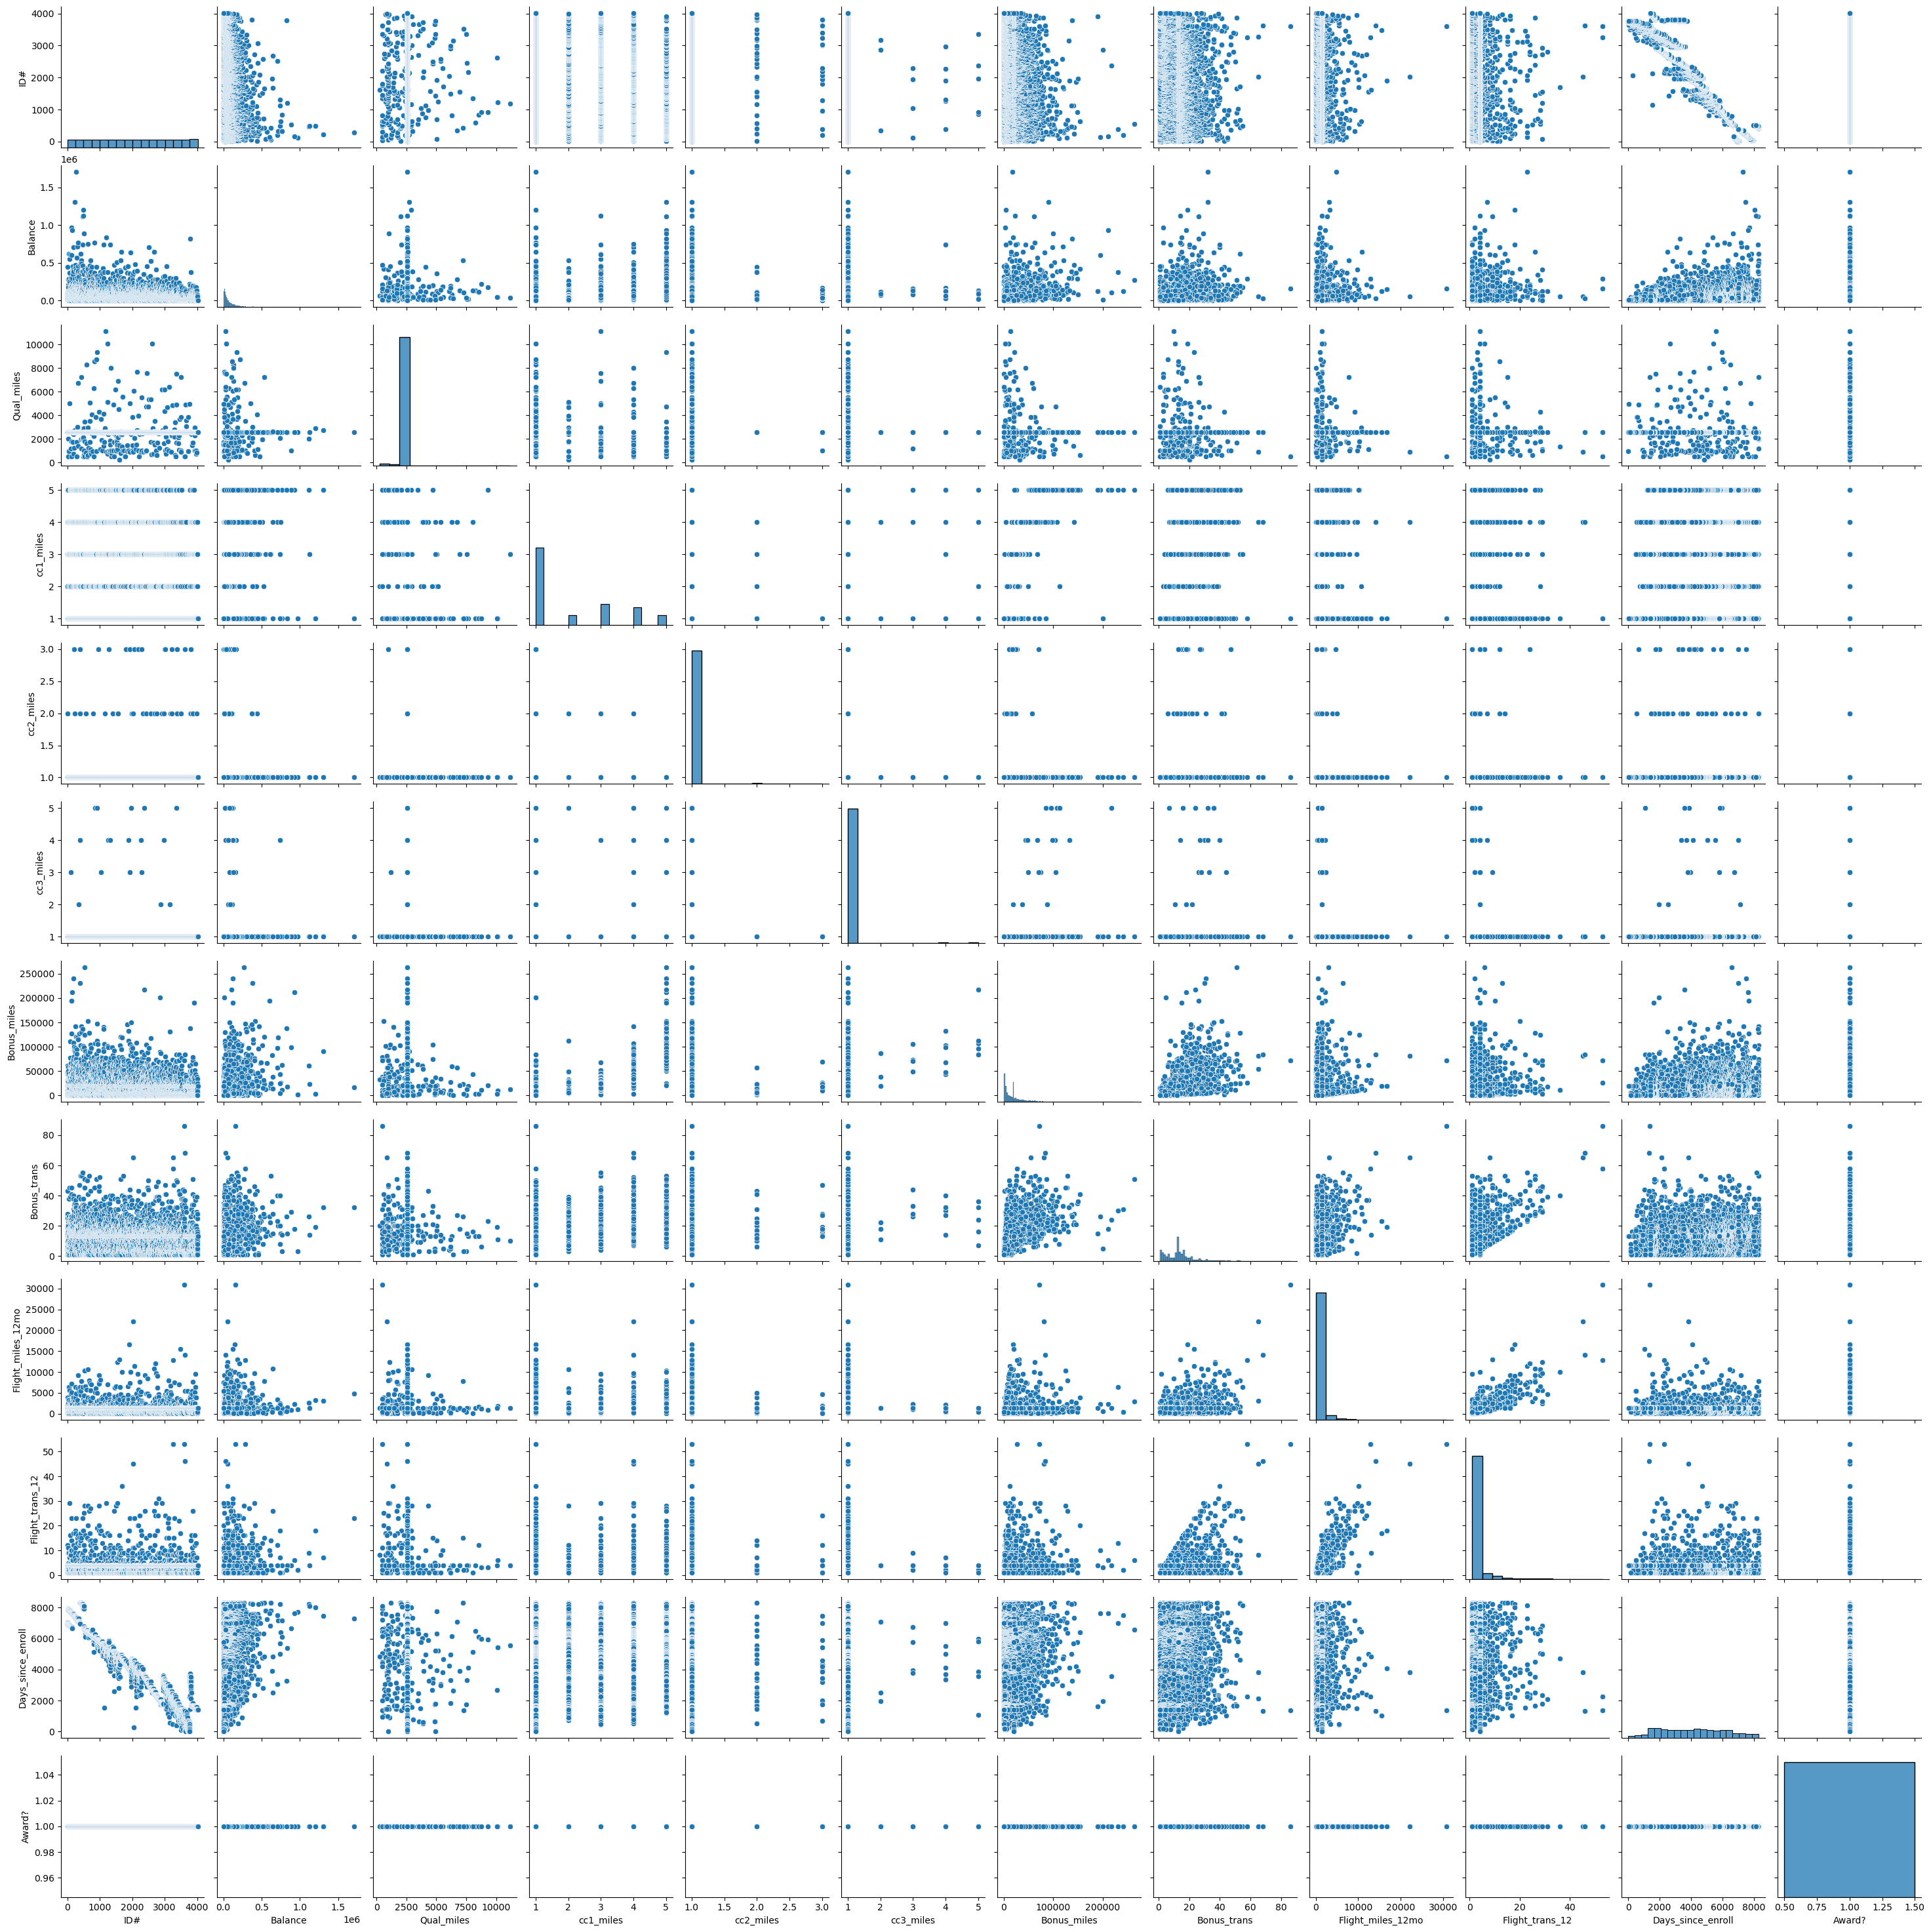

In [11]:
# making pairplot for better visualization

plt.figure(figsize=(15,15))
sns.pairplot(df)

<Axes: >

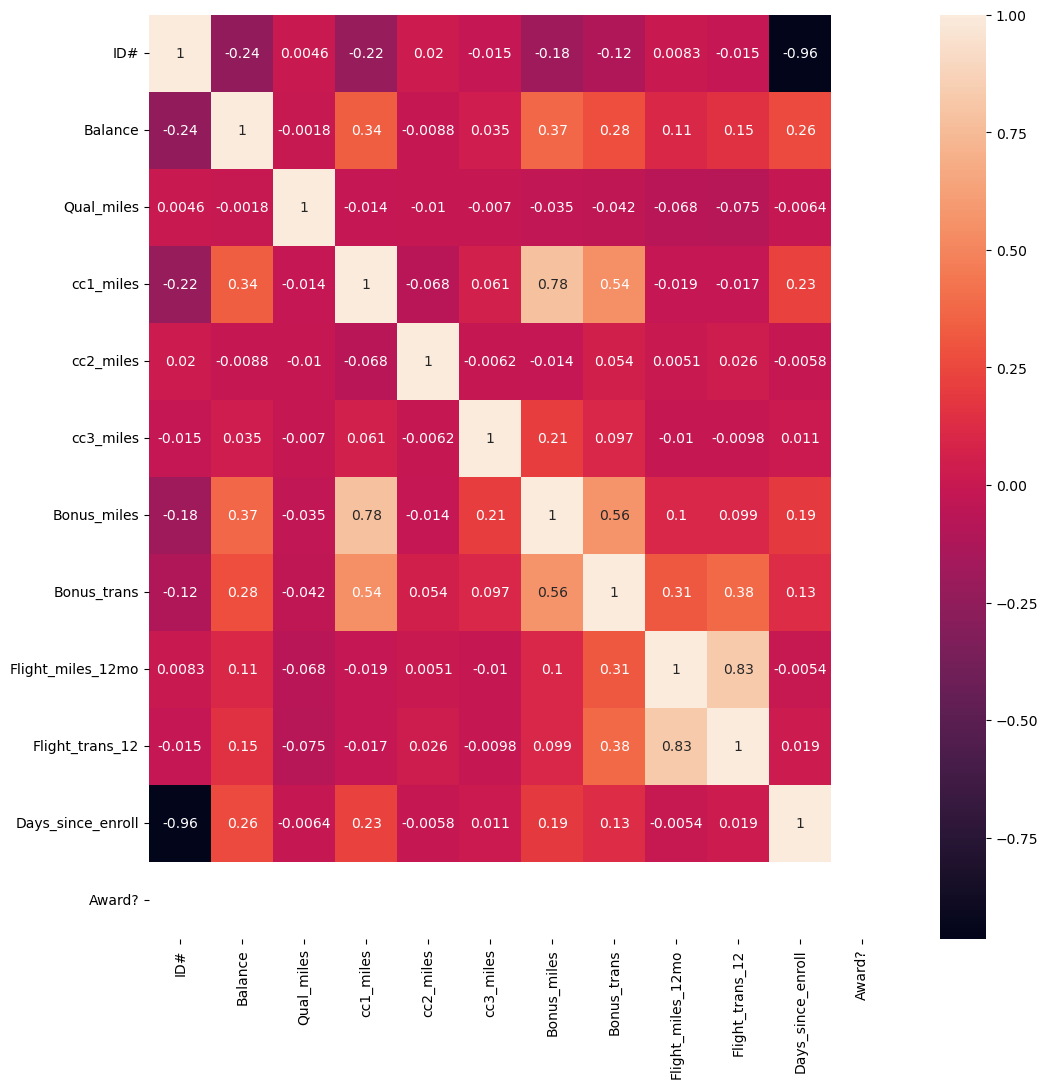

In [12]:
# Generating correlation heatmaps to explore relationships between pairs of variables

plt.figure(figsize=(12,12))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True)

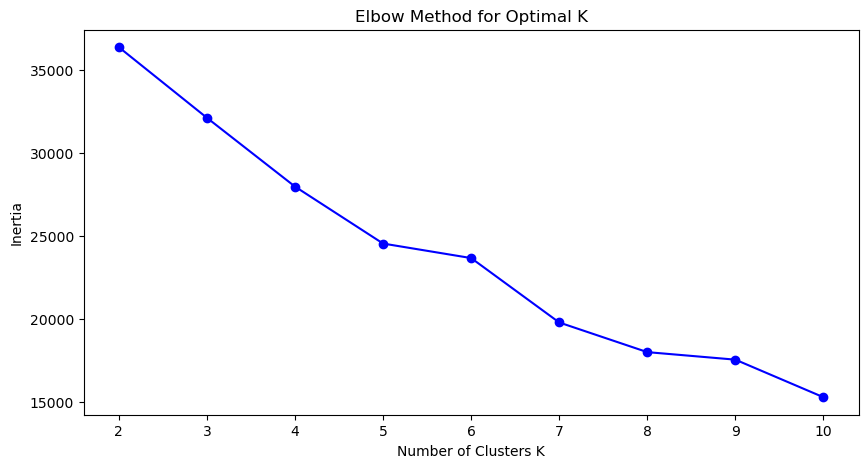

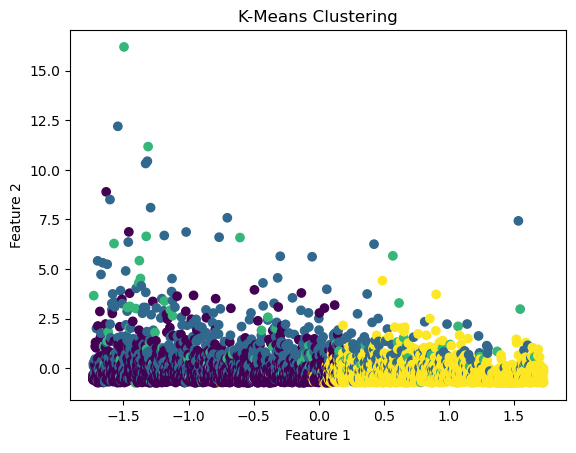

Silhouette Score for K-Means: 0.261


In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocess data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to find optimal K
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose optimal K (e.g., K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Visualize K-Means Clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette_score:.3f}')

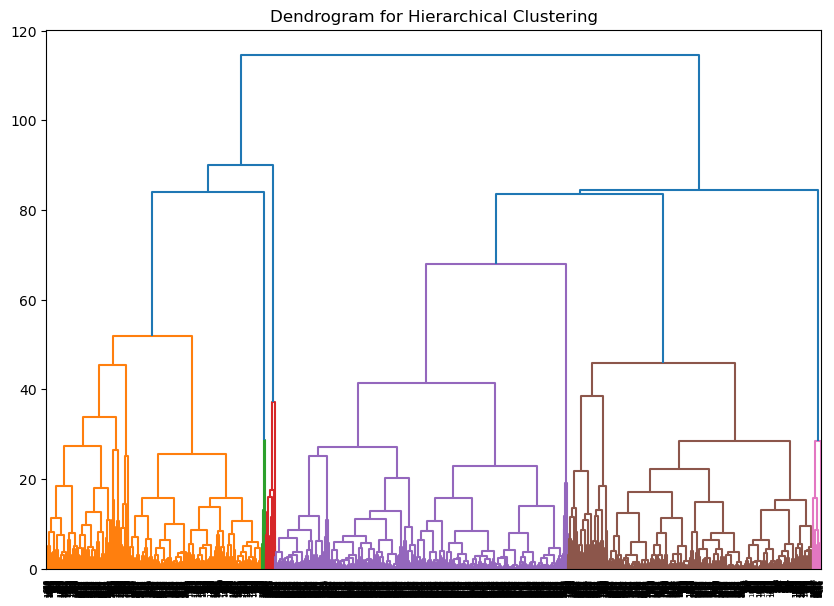

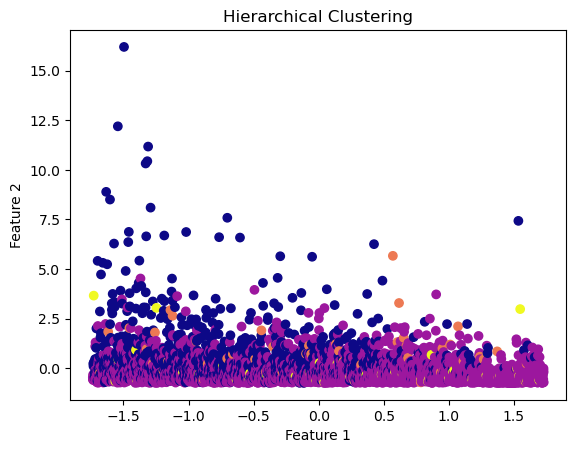

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
linked = linkage(scaled_data, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Fit Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Visualize Hierarchical Clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

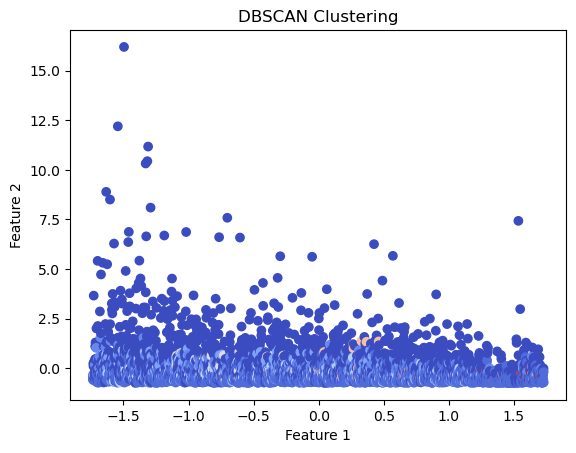

In [15]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualize DBSCAN Clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()